## **Simple Linear Regression**
In this task we perform simple linear regression on two variables using Python Scikit-Learn library to predict the percentage of a student based on no. of study hours.

In [2]:
# Importing all required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the data from given link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data download successful")
data.head(10)

Data download successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Now we plot the data to see if we can find any relationship between the data.

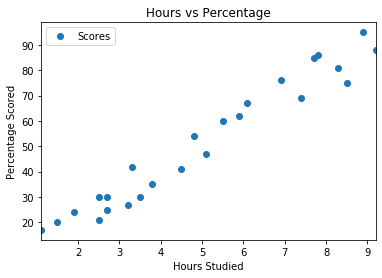

In [4]:
# Plotting the given data
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

#### From the distribution above it is clear that there is a positive linear relation between the Percentage scored and the no. of study hours

## Now to find out if a student studies more than 9.25 hours a day what will be their score.
For this we split the data into test and train sets and do linear regression to predict the score.

### Prepare the data
Divide the values into attributes(input) and labels(output)

In [5]:
x = data.iloc[:, :-1].values
y = data.iloc[:,1].values

#### Split the data into test and train sets using Scikit-learn library

In [6]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm
After splitting the data, we train the algorithm.

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Training complete')

Training complete


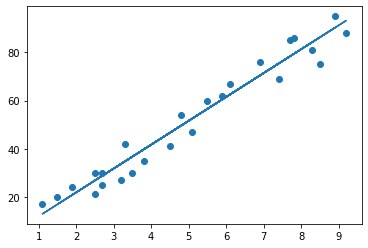

In [8]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Making Predictions
After we train the data, we make prediction using the test data.

In [9]:
# Test data in hours
print(x_test)
# Prediction of the data
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual to Predicted value
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
hours = 9.25
own_pred = regressor.predict(np.array(hours).reshape(1,1))
print("No. of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of hours = 9.25
Predicted Score = 93.69173248737535


### Model Evaluation

In [14]:
from sklearn import metrics  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.598769307217406


## Conclusion
### So we can see that if a student studies for 9.25 hours a day, the student's predicted score comes out to be 93.69 percent with an MSE of around 21.6.